# SALES ANALYSIS

# Libraries

In [162]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib notebook

# Merging

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)            # reading the each of the file
    all_months_data = pd.concat([all_months_data, df])  # merging into one file

all_months_data.to_csv('all_months_data.csv', index=False)

# Read Updated Df

In [23]:
all_data = pd.read_csv('all_months_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

# drop the NaN

In [24]:
find_nan = all_data[all_data.isna().any(axis=1)]

display(find_nan)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
all_data = all_data.dropna(how='all')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [32]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']


# convert columns into correct type

In [33]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Augment data with additional columns

# Add Month column

In [34]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Add Sales Column

In [35]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [36]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2][:3]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)


# EDA

# Q1: Best month for Sales? How much Earned that Month?

In [37]:
all_data.groupby('Month').sum().sort_values(by=['Sales'],ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


<IPython.core.display.Javascript object>


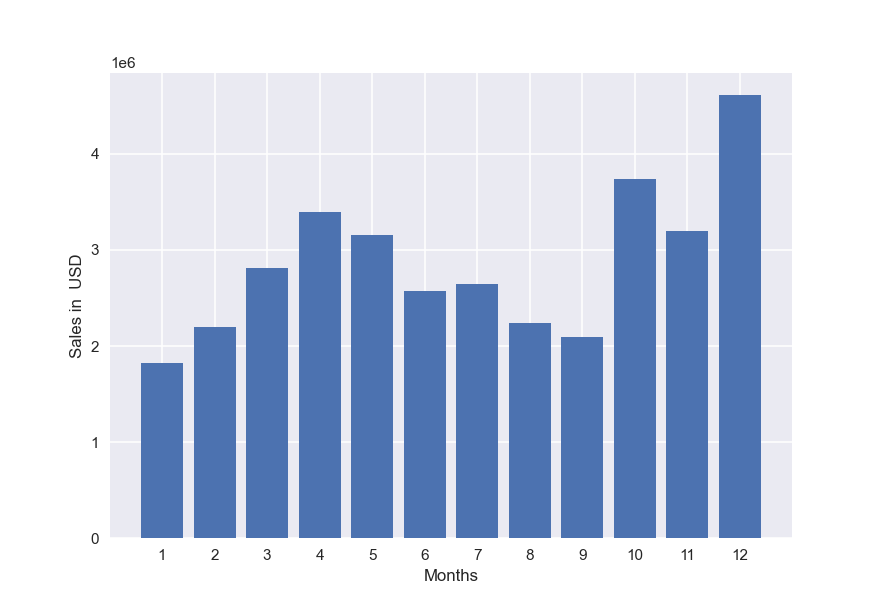

In [38]:
plt.style.use('seaborn')

months = range(1,13)
results = all_data.groupby('Month').sum()
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in  USD')


plt.show()

# Q2: City with Highest number of Sales

In [39]:
result = all_data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta ( GA),16602,2779908.20,104794,2795498.58
Austin ( TX),11153,1809873.61,69829,1819581.75
Boston ( MA),22528,3637409.77,141112,3661642.01
Dallas ( TX),16730,2752627.82,104620,2767975.40
Los Angeles ( CA),33289,5421435.23,208325,5452570.80
New York City ( NY),27932,4635370.83,175741,4664317.43
Portland ( ME),2750,447189.25,17144,449758.27
Portland ( OR),11303,1860558.22,70621,1870732.34
San Francisco ( CA),50239,8211461.74,315520,8262203.91


In [40]:
#plt.style.use('seaborn')

City = [city for city,df in all_data.groupby('City')]

#results = all_data.groupby('City').sum()

#plt.bar(City, results['Sales'])

#plt.xticks(City, rotation = 40, fontsize=6)
#plt.xlabel('Cities')
#plt.ylabel('Sales in  USD')


#plt.show()
City

[' Atlanta ( GA)',
 ' Austin ( TX)',
 ' Boston ( MA)',
 ' Dallas ( TX)',
 ' Los Angeles ( CA)',
 ' New York City ( NY)',
 ' Portland ( ME)',
 ' Portland ( OR)',
 ' San Francisco ( CA)',
 ' Seattle ( WA)']

<IPython.core.display.Javascript object>


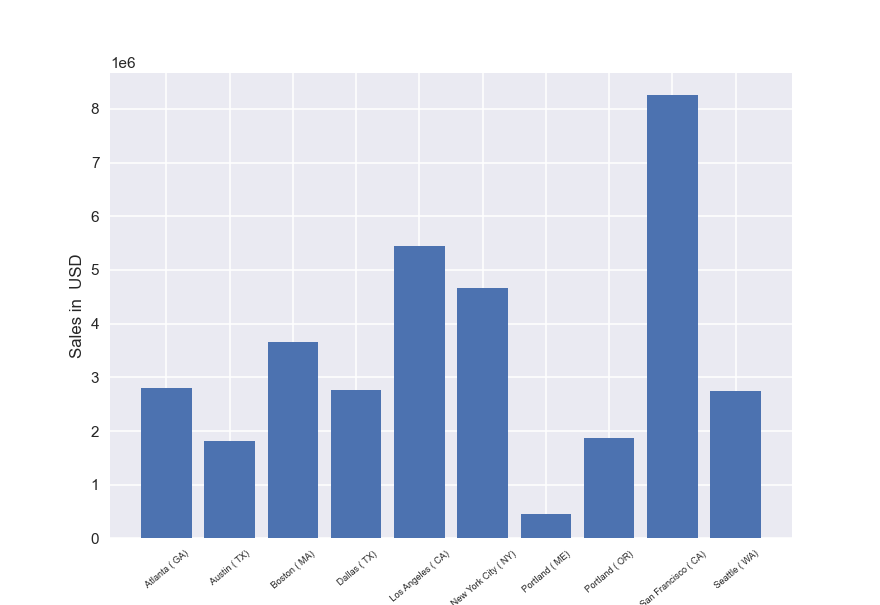

In [41]:
plt.style.use('seaborn')

City = [city for city,df in all_data.groupby('City')]

results = all_data.groupby('City').sum()

plt.bar(City, results['Sales'])

plt.xticks(City, rotation = 40, fontsize=6)
plt.xlabel('Cities')
plt.ylabel('Sales in  USD')


plt.show()


#  Q3:What time should we display advertisements to maximize likelihood of customer's buying product?

In [42]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [43]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),9,27


In [45]:
hours = [hour for hour,df in all_data.groupby('Hour')]
counts = all_data.groupby('Hour').count()


<IPython.core.display.Javascript object>


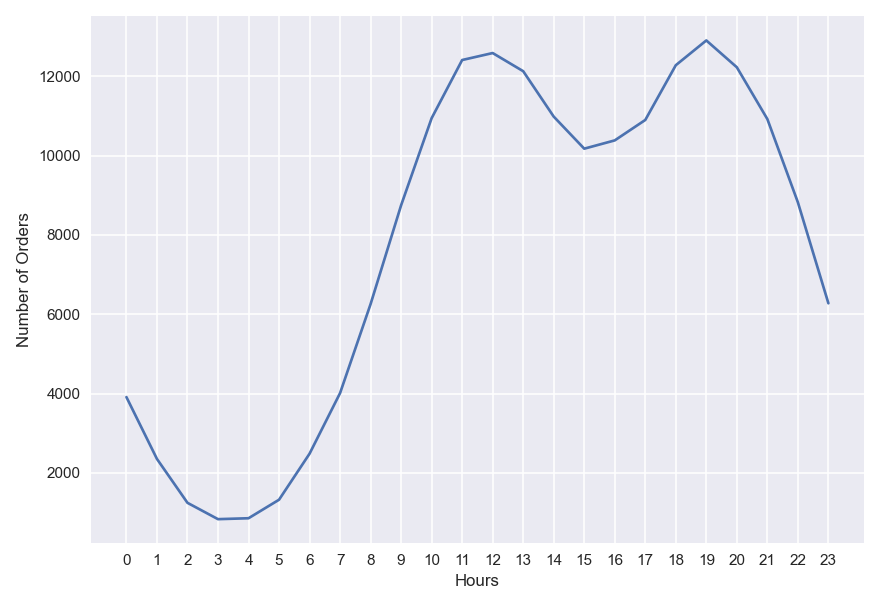

In [49]:
plt.style.use('seaborn')


plt.plot(hours,counts['Minute'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

# Recommend around 12 pm (12) or 7pm (19)

# Q4: What products are most often sold together?

In [69]:
data = all_data.sort_values(['Product', 'Quantity Ordered'])

a = (data.set_index('Order ID')
    .groupby('Product')
    .agg({'Product':list}).reset_index()
    
d = pd.pivot_table(a,index=['Product','Quantity Ordered'],values='Product',aggfunc='count').reset_index()

SyntaxError: invalid syntax (822416341.py, line 7)

In [73]:
all_data.groupby('Product').size().idxmax()

'USB-C Charging Cable'

In [74]:
all_data['Product'].mode()


0    USB-C Charging Cable
Name: Product, dtype: object

In [132]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

C:\Users\Naveen\AppData\Local\Temp\ipykernel_23360\137061350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [133]:
df.groupby('Grouped').size().idxmax()

'iPhone,Lightning Charging Cable'

In [139]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

    
    
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Q5: What product sold the most? Why do you think it sold the most?

In [175]:
product = all_data.groupby('Product').sum().reset_index()

product

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.00,79479,162773


<IPython.core.display.Javascript object>


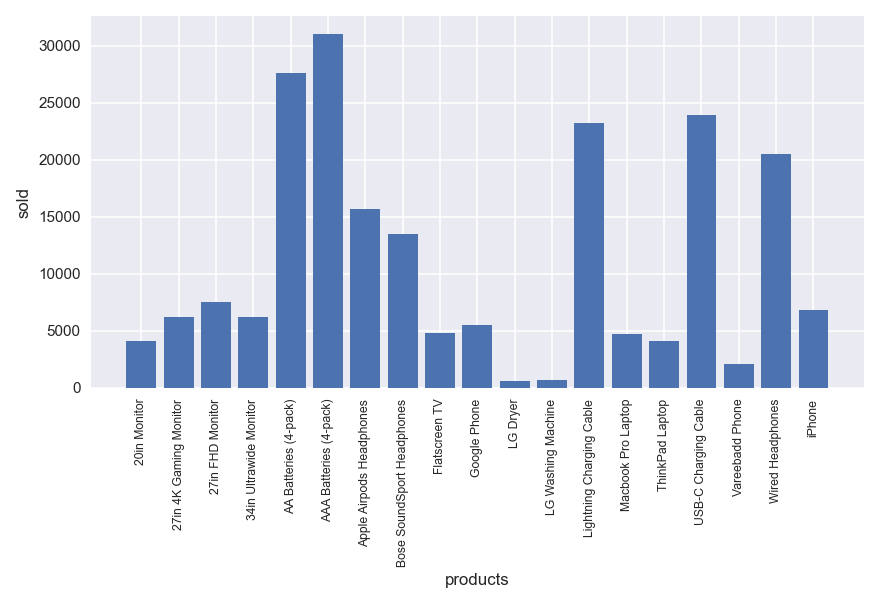

In [176]:
plt.style.use('seaborn')

x = product['Product'].unique()

plt.bar(x,product['Quantity Ordered'])

plt.xticks(x, rotation = 90,fontsize=8)

plt.xlabel('products')
plt.ylabel('sold')


plt.tight_layout()

plt.show()

In [219]:
prices = all_data.groupby('Product').mean().reset_index()['Price Each']

prices

0      109.99
1      389.99
2      149.99
3      379.99
4        3.84
5        2.99
6      150.00
7       99.99
8      300.00
9      600.00
10     600.00
11     600.00
12      14.95
13    1700.00
14     999.99
15      11.95
16     400.00
17      11.99
18     700.00
Name: Price Each, dtype: float64

<IPython.core.display.Javascript object>


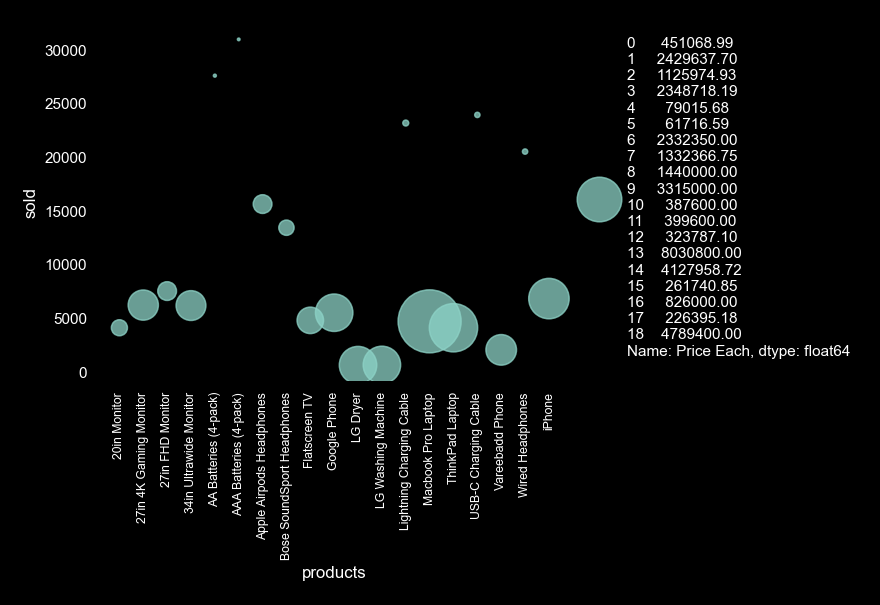

In [254]:
plt.style.use('dark_background')

x = product['Product'].unique()
y = product['Quantity Ordered']
price = product['Price Each']


plt.scatter(x,y, s = prices, cmap='Greens', label=price, linewidths=1, alpha=0.75)


plt.grid(False)


            
plt.xticks(x, rotation = 90,fontsize=8)

plt.xlabel('products')
plt.ylabel('sold')


plt.legend(bbox_to_anchor = (1 , 1))

plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


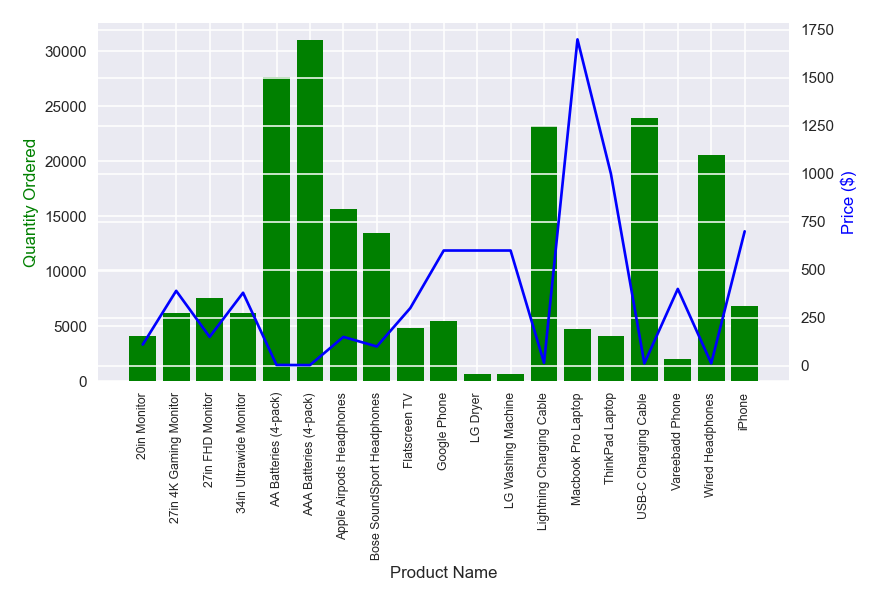

C:\Users\Naveen\AppData\Local\Temp\ipykernel_23360\3732955373.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation='vertical', size=8)


In [243]:
plt.style.use('seaborn')

a = all_data.groupby('Product').mean().reset_index()
b = all_data.groupby('Product').sum().reset_index()

x = a['Product']
y = b['Quantity Ordered']
p = a['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='g')
ax2.plot(x, p, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(x, rotation='vertical', size=8)

plt.tight_layout()

fig.show()